In [8]:
%load_ext autoreload
%autoreload 2

from pyba.CameraNetwork import CameraNetwork
import pickle
import glob

n_cameras = 7
image_path = './data/test/camera_{cam_id}_img_00000{img_id}.jpg'
pr_path = './data/test/df3d_2/pose_result*.pkl'
d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))
points2d = d['points2d']
calib = {cid:d[cid] for cid in range(n_cameras)}

camNet = CameraNetwork(points2d=points2d, calib=calib, image_path=image_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
_ = camNet.triangulate()

In [10]:
camNet.reprojection_error()

[5.714680813592196,
 5.745230489704862,
 4.867326062625685,
 0.0,
 5.614332640824146,
 8.366535725871938,
 9.715039415583135]

(-0.5, 6719.5, 479.5, -0.5)

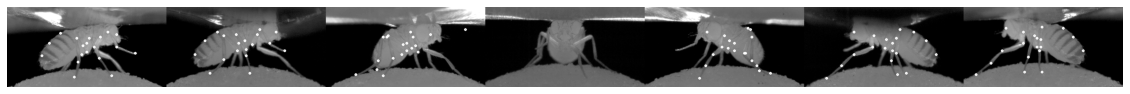

In [11]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='points2d')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')

(-0.5, 6719.5, 479.5, -0.5)

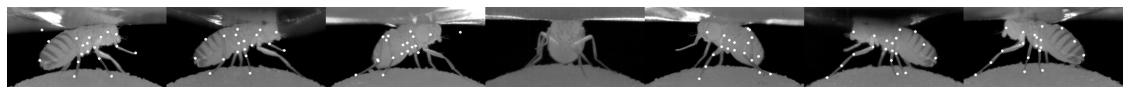

In [12]:
import matplotlib.pyplot as plt
#camNet._points3d = d['points3d']
img = camNet.plot_2d(0, points='reprojection')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')